# Notebook E-tivity 3 CE4021 Task 1

**Student name:** Jason Coleman

**Student ID:** 9539719

## Imports

In [419]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

# Task 1: Option Dice

Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

* Briefly explain the type of random variable and probability distribution you will use. The choice of a continuous or a discrete random variable, and the probability distribution (normal, uniform, binomial, ..) should be informed by the type of experiment.

* Write Python code to simulate the experiment. The code should run the experiment a sufficient number of times such that you can experimentally approximate the following:

* The expected value of your random variable.

* The standard deviation of your random variable.

* Plot the distribution found in your simulated experiment with an appropriate number of 'bins'

**N.B.:**

* Structure your notebook as follows:
    1. Markdown cell with problem description
    2. Markdown cells with expected value and standard deviation of your random variable
    3. Cell(s) with experiment
    4. Cell(s) with outputs and graphs
    5. Commentary comparing calculated values to experimentally obtained values.

* You may only use the following modules:
    * Random
    * Numpy
    * A visualisation module such as Matplotlib
    * Math

* You are not required to perform exception handling.
* You are not required to provide tests for your code.

# Solution

I will start by outlining the problem. Roll two 6-sided fair dice and determine the probability that the sum of the two dice is less than 3 or more than 10.

| Dice Roll       | Description      | Probability   | Probability |
|-----------------|-----------------|---------------|-------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 1/36 | 0.0278      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 1/36 | 0.0278      |


## Structure
The structure of the assignement is as follows:

* I will calculate the various required elements: probabilities, Expected value of the random variable and std-dev of the Random variable. 
* Then I will implement python code to roll dice, describe the experiments, summarise the outcomes with tables and plots. 
* Run the experiments
* Reflect on the observations
* The Appendix will hold things like mathematical derivations and miscellaneus experiments (outside the scope)

## Calculating P(X), E[X] and std-dev for the Random variable

When rolling 2d6, each die has 6 possible outcomes: {1, 2, 3, 4, 5, 6}. The sample space for rolling two such dice is the set of all possible ordered pairs of outcomes, one from the first die and one from the second die.

There are a total of $6 \times 6 = 36$ possible ordered pairs in the total sample space.

$$
S = \{ (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), \\
    (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), \\
    (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), \\
    (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), \\
    (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), \\
    (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6) \}
$$

But we will only we working with a subset due to the filtering (i.e. $X \lt 3$ or $X \gt 10$).

**Goal:** Determining the probability that the sum of the two dice is less than 3 or more than 10
$$
P(X \lt 3 | X \gt 10)
$$

### Probability
The subset of ordered pairs, known as the possible outcomes, that sum to $> 10$ or $< 3$ are:

$$
S' = \{ (1, 1), (5, 6), (6, 5), (6, 6) \}
$$


To find the probability of rolling an ordered pair that belongs to the subset $S'$, we divide the number of desired outcomes by the total number of possible outcomes when rolling two six-sided dice. 

The probability of rolling one of the desired outcomes, $P(S')$ is:

$$
P(S') = \frac{\text{No. of desired outcomes}}{\text{Total Number of Outcomes}}
$$

$$
P(S') = \frac{4}{36} = \frac{1}{9} \approx \boxed{0.11}
$$

 Another way to look at this is:

* Rolling less than 3, rolling a (1,1):


$$
\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} = \boxed{0.0278}
$$


* Rolling greater than 10: rolling (5,6), (6,5), (6,6)


$$
(\frac{1}{6} \times \frac{1}{6}) = \frac{1}{36}
$$

$$
(\frac{1}{6} \times \frac{1}{6}) + (\frac{1}{6} \times \frac{1}{6}) = \frac{1}{18}
$$

$$
=> \frac{1}{36} + \frac{1}{18} = \frac{1}{12} = \boxed{0.0834}
$$

* Probability of rolling a desired outcome is:

$$
0.0278 + 0.0834 \approx  \boxed{0.1112}
$$

### Expected Value

The expected value (often denoted as $E[X]$ for a random variable is a measure of the "center" of a probability distribution (like the mean). It gives us the average or mean value of the outcomes, weighted by their probability. 

For discrete random variables, like our dice roll, the expected value is calculated as:

$$
E[X] = \sum_{i=1}^{n} p(x_i) x_i
$$

Where

* $n$ is the total number of possible outcomes. For this example, \( n = 11 \).
* $p(x_i)$ is the probability of the $i$-th outcome.
* $x_i$ is the actual value of the $i$-th outcome.

### Standard Deviation
The std deviation can be derived from the Expected value calculation.

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$

Assembling the outcomes and intermediate values in a table and using the above formula we get $E[X]$ and $\sigma$.

| Outcome, Sum (x_i) | Probability, p(x_i) | p(x).x | p(x).x^2 |
|--------------:|-------------------------:|----------------------:|------------------------:|
|             2 |                      1/36 |                 2/36  |               4/36     |
|             3 |                      2/36 |                 6/36  |              18/36     |
|             4 |                      3/36 |                12/36  |              48/36     |
|             5 |                      4/36 |                20/36  |             100/36     |
|             6 |                      5/36 |                30/36  |             180/36     |
|             7 |                      6/36 |                42/36  |             294/36     |
|             8 |                      5/36 |                40/36  |             320/36     |
|             9 |                      4/36 |                36/36  |             324/36     |
|            10 |                      3/36 |                30/36  |             300/36     |
|            11 |                      2/36 |                22/36  |             242/36     |
|            12 |                      1/36 |                12/36  |             144/36     |
| $E[X]$      |                           |                    **7**  |                        |
| $\sigma$     |                           |                          |              **2.47**   |

It is worth nothing that the probability column also shows you how many ways there are to generate each sum. E.g. There's only one way to roll a sum of 2, but 6 ways to rolls a sum of 7. 

### Mathematical Summary
The following table shows the calculations: 

* At face value, the distribution of 2d6, filtering out X<2 or X>10 is non-uniform. The distribution for an unfiltered 2d6 is not normal but tends towards triangular.
* Random Variables, $X$ are numerical values that are assigned to an outcome of an event. We can calculate the probability of the random variable having a particular value ($P(x)$).
* Our random variables are discrete (countable and finite).
* The possible outcomes are, $\boxed{S' = \{ 2, 11, 11, 12 \}}$ out of a total of 36 possible dice throws.
* The `probability` of rolling one of the desired outcomes is $\boxed{0.1112}$
* The `Expected Value` is: $\boxed{E[X] = 7}$
* The `standard deviation`, $\boxed{\sigma\ \approx 2.47}$
* Depending on how we phrase this, this "game" could be termed a `Bernoulli Trial` since we are measuring success (sum < 3 or > 10) or failure so, then the  distribution is `Binomial`. See the Appendix for more details, the game section.

## Python Implementation
The approach I'll take will rely on rolling lots of 2d6 and measuring when the sums of the dice match our conditions. I will want to see if the number of trials I do, impacts how well I match the previous paper-based calculations (see [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)). 

When I write this code, I'm not really thinking about the type of distributions; I just want to run the experiments to see the shapes I get. I can then match it to the theory above.

It seems like the approach we take depends on how we phrase the problem. You could say that this task relates to a very simple dice game where:

* The player has two six-sided dice
* You `win` the round if you roll one of the combinations below.
* Else, you `lose`.

| Dice Roll       | Description      | 
|-----------------|-----------------|
| <span style="font-size:24px;">&#9856;</span> <span style="font-size:24px;">&#9856;</span> | Snake eyes (&#x4DFE;) | 
| <span style="font-size:24px;">&#9860;</span> <span style="font-size:24px;">&#9861;</span> | Yo/Yo-leven      |
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9860;</span> | Six five, no Jive | 
| <span style="font-size:24px;">&#9861;</span> <span style="font-size:24px;">&#9861;</span> | Boxcars/Midnight | 

So, what is the probability of winning the game? 

There are two outcomes: success or failure. In this case, the distribution for the sum of two die rolls is `non-uniform`. We could consider this a `Bernoulli Trial` since we are measuring success (where sum < 3 or > 10) or failure. 

### Utility functions

In [420]:
def roll_2d6() -> int:
    """
    Simple function to roll 2d6 and return the sum of the two dice.

    :return: A sum of random variables representing the event, rolling 
             a dice (Sum of a single 2d6 dice roll).
    """

    return random.randint(1,6) + random.randint(1,6)

In [421]:
def plot_results(trial_sizes, results):
    """ 
    Plot Probability Mass Function (PMF) and Cumulative Distribution 
    Function (CDF) of the sum of 2d6 for various trial sizes using subplots
    (to make it easier to compare the impacts of trial size).

    :param trial_sizes: A list of trial sizes to plot.
    :param results: A list of tuples containing the results of the trials.
    :return: None
    """
    num_trials = len(trial_sizes)

    # Set up subplots so we have our charts all in the same place
    _ , axes = plt.subplots(nrows=num_trials, ncols=2, figsize=(15, 5 * num_trials))

    for idx, (sums, _, mean, std_dev, two_std_dev) in enumerate(results):
        # Probability Mass Function (PMF)
        axes[idx][0].hist(sums, bins=11, density=True, label=f"{len(sums):,} Trial(s)", color='lightblue')
        axes[idx][0].axvline(mean, color='r', linestyle='solid', linewidth=1, label="$E[X]$")
        axes[idx][0].axvline(mean + std_dev, color='g', linestyle='dotted', linewidth=1, label="+1 $\sigma$")
        axes[idx][0].axvline(mean - std_dev, color='g', linestyle='dotted', linewidth=1, label="-1 $\sigma$")
        axes[idx][0].axvline(mean + two_std_dev, color='b', linestyle='dashed', linewidth=1, label="+2 $\sigma$")
        axes[idx][0].axvline(mean - two_std_dev, color='b', linestyle='dashed', linewidth=1, label="-2 $\sigma$")
        axes[idx][0].set_title(f"PMF for {len(sums):,} Trial(s)")
        axes[idx][0].legend()

        # Cumulative Distribution Function (CDF)
        axes[idx][1].hist(sums, bins=11, density=True, cumulative=True, label=f"{len(sums):,} Trial(s)", color='lightgreen')
        axes[idx][1].axvline(mean, color='r', linestyle='solid', linewidth=1, label="$E[X]$")
        axes[idx][1].axvline(mean + std_dev, color='g', linestyle='dotted', linewidth=1, label="+1 $\sigma$")
        axes[idx][1].axvline(mean - std_dev, color='g', linestyle='dotted', linewidth=1, label="-1 $\sigma$")
        axes[idx][1].axvline(mean + two_std_dev, color='b', linestyle='dashed', linewidth=1, label="+2 $\sigma$")
        axes[idx][1].axvline(mean - two_std_dev, color='b', linestyle='dashed', linewidth=1, label="-2 $\sigma$")
        axes[idx][1].set_title(f"CDF for {len(sums):,} Trial(s)")
        axes[idx][1].legend()

    plt.tight_layout()
    plt.show()

In [422]:
def run_experiments(trial_sizes: list) -> None:
    """
    Run an experiment for each trial size. For each trial size, we will
    roll 2d6 the number of times specified by the trial size and store
    the results. We will then calculate the mean and standard deviation
    of the results and store them in a tuple along with the results.
    Finally, we will plot the results.

    :param trial_sizes: A list of trial sizes to plot.
    :return: None
    """
    
    results = []
    for num_trials in trial_sizes:
        #Don't think twice, roll the dice, num_trials times
        sums = [roll_2d6() for _ in range(num_trials)]

        # gather descriptive stats
        p_x = [sums.count(x) / num_trials for x in range(2, 13)]
        print(f"P(x) for {num_trials} trial(s) are: {p_x}")
        p_x_lt_3_or_gt_10 = p_x[0] + p_x[-2] + p_x[-1]  # Novel array access - Probabilities for 2, 11, and 12
        mean = np.mean(sums)
        std_dev = np.std(sums)
        two_std_dev = 2 * std_dev

        #cache them
        results.append((sums, p_x_lt_3_or_gt_10, mean, std_dev, two_std_dev))

    plot_results(trial_sizes, results)

    # Generate a table 
    table = []
    for idx, (sums, p_x_lt_3_or_gt_10, mean, std_dev, two_std_dev) in enumerate(results):
        table.append([len(sums), p_x_lt_3_or_gt_10, mean, std_dev, two_std_dev])

    print(f"\n\n{'Trials':>10} |{'P(>10 or <3)':>15} | {'Mean':>10} | {'Std Dev':>10} | {'2 Std Dev':>10}")
    print("-" * 70)
    for row in table:
        print(f"{row[0]:>10,} | {row[1]:>15.4f} | {row[2]:>10.4f} | {row[3]:>10.4f} | {row[4]:>10.4f}")


### Run the experiments

P(x) for 1 trial(s) are: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
P(x) for 100 trial(s) are: [0.02, 0.04, 0.07, 0.09, 0.14, 0.16, 0.17, 0.12, 0.05, 0.09, 0.05]
P(x) for 1000 trial(s) are: [0.026, 0.045, 0.081, 0.128, 0.137, 0.186, 0.142, 0.097, 0.066, 0.065, 0.027]
P(x) for 10000 trial(s) are: [0.0271, 0.0542, 0.0834, 0.1115, 0.134, 0.1703, 0.1395, 0.1105, 0.0894, 0.0544, 0.0257]
P(x) for 100000 trial(s) are: [0.0273, 0.0552, 0.08392, 0.11284, 0.1389, 0.16587, 0.13757, 0.11149, 0.0831, 0.05576, 0.02805]
P(x) for 1000000 trial(s) are: [0.027679, 0.05484, 0.083422, 0.110936, 0.139596, 0.166959, 0.138645, 0.111754, 0.08319, 0.055355, 0.027624]


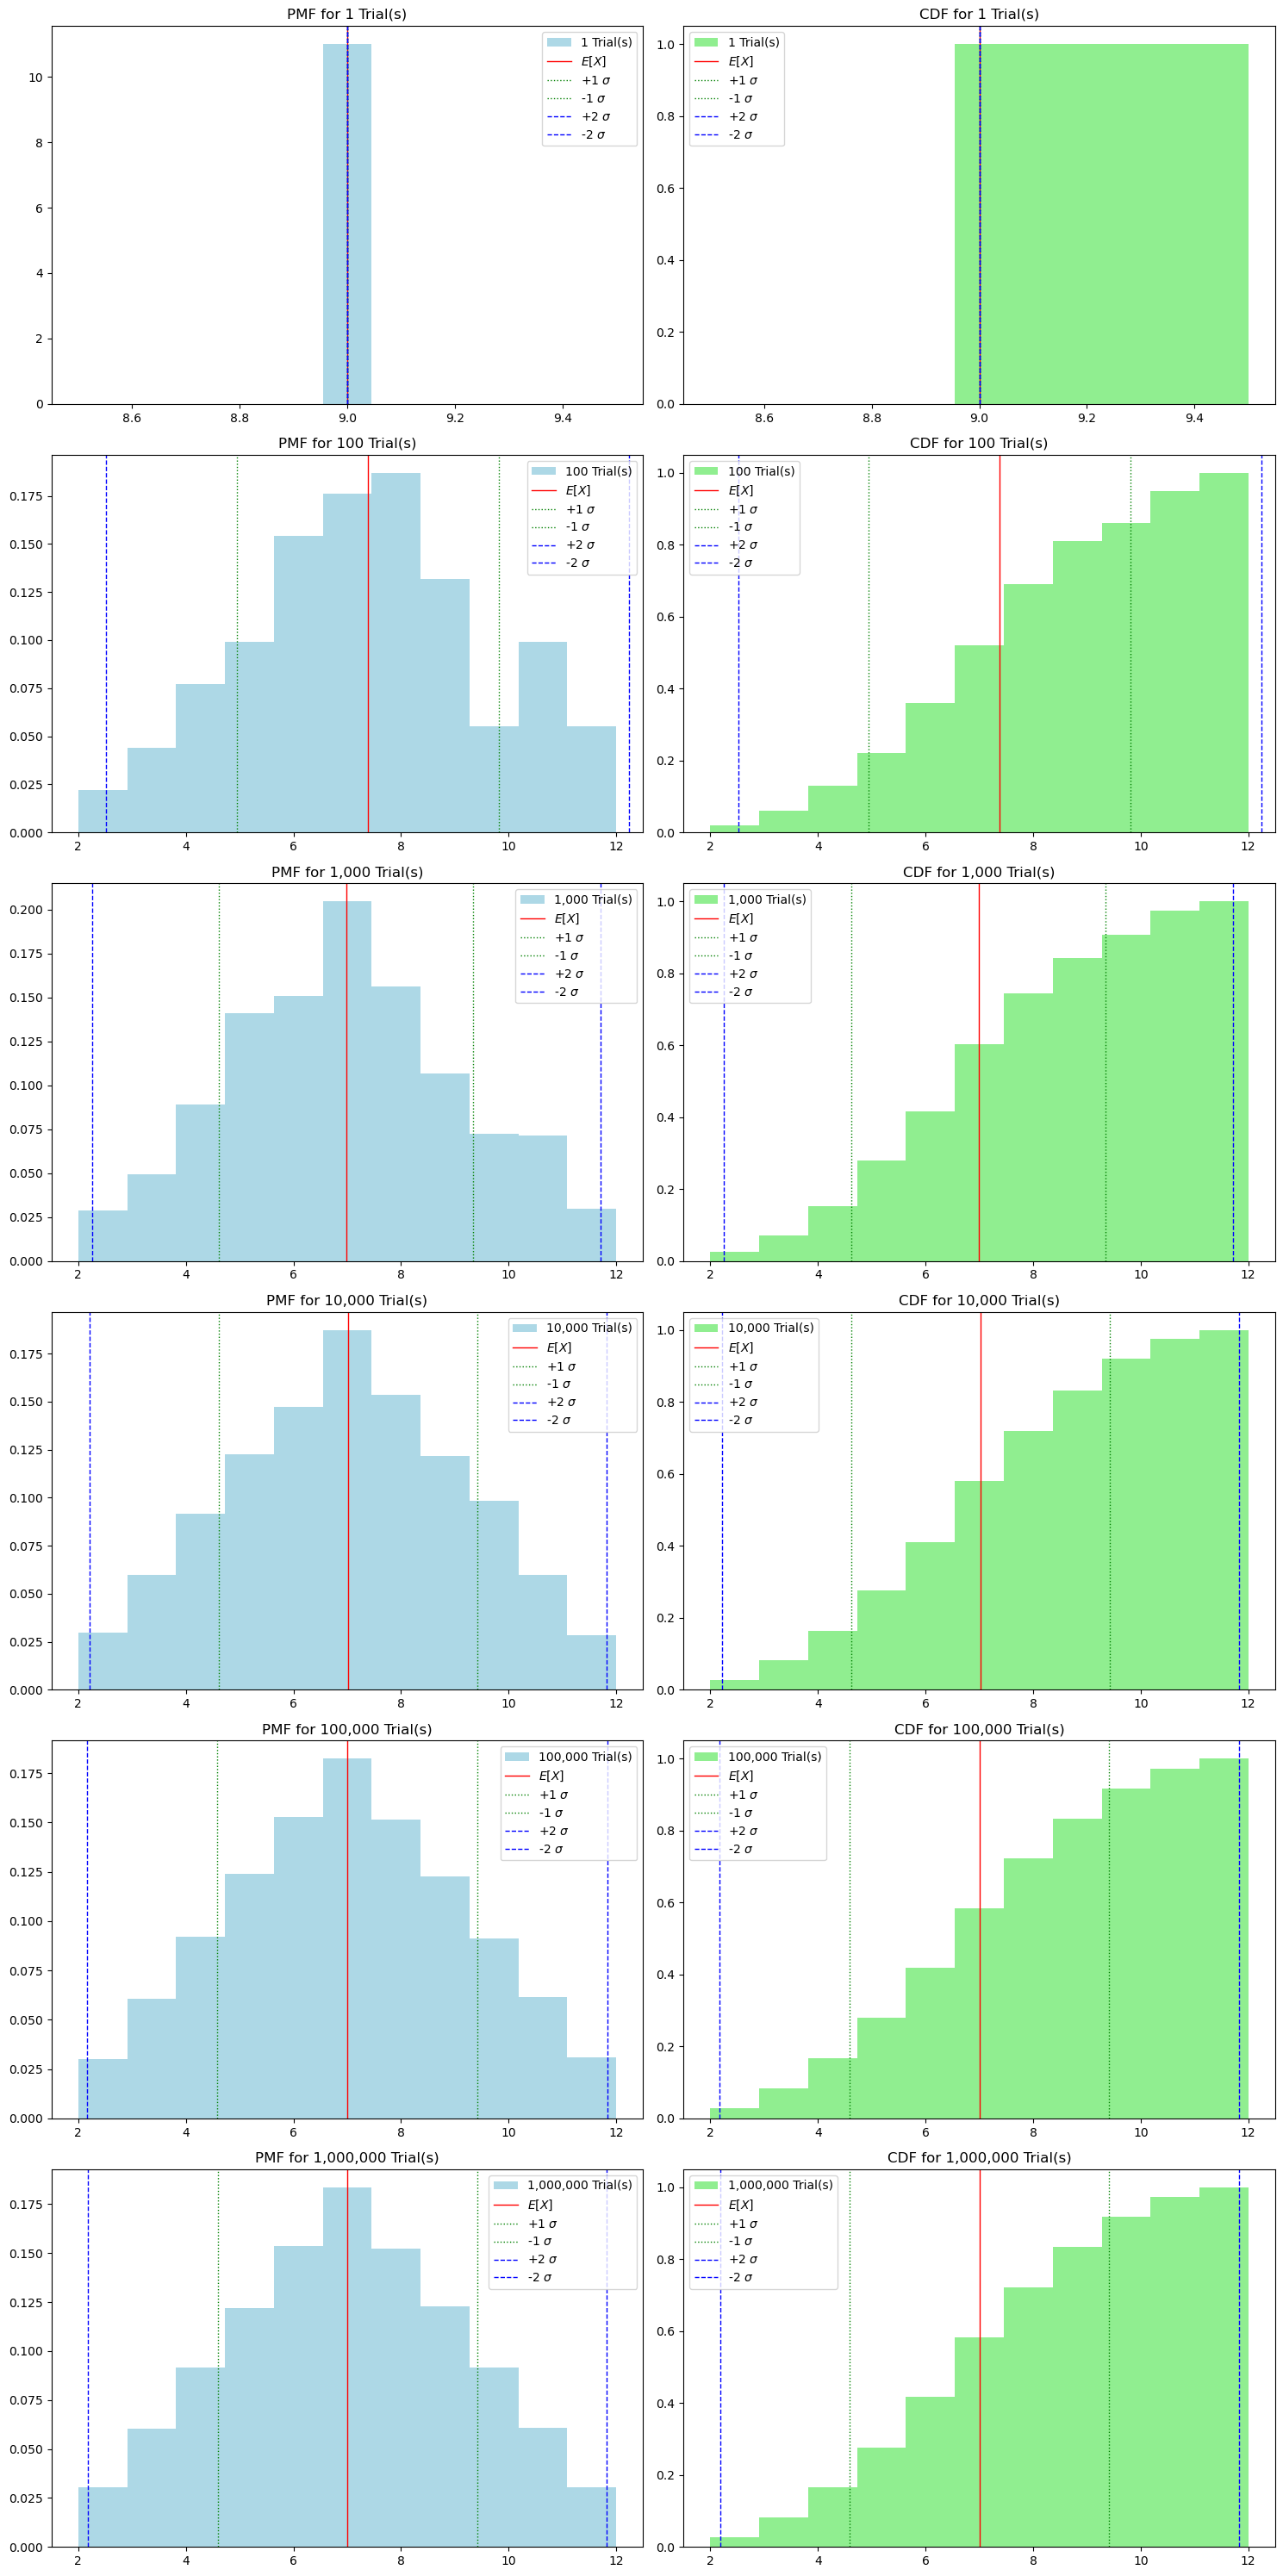



    Trials |   P(>10 or <3) |       Mean |    Std Dev |  2 Std Dev
----------------------------------------------------------------------
         1 |          0.0000 |     9.0000 |     0.0000 |     0.0000
       100 |          0.1600 |     7.3800 |     2.4322 |     4.8644
     1,000 |          0.1180 |     6.9830 |     2.3636 |     4.7272
    10,000 |          0.1072 |     7.0153 |     2.4029 |     4.8059
   100,000 |          0.1111 |     6.9995 |     2.4158 |     4.8316
 1,000,000 |          0.1107 |     7.0018 |     2.4113 |     4.8225


In [423]:
# Do the experiments for the following trial sizes 
trial_sizes = [1, 100, 1_000, 10_000, 100_000, 1_000_000]
run_experiments(trial_sizes)

## Reflection

**Peer Feedback:**

* I noted and was reminded by Mitch's use of std-dev relative to the mean; realised it's a way to communicate just how unlikely you are to win this game. Have used this in my solution.
* Philip Clarke also gave me a clue that I gone massively off-track on my initial draft. Thank you! 

**Number of Trials:** The number of trials has a big impact on the visualisations. If you do too few trials, you will not get a good idea of the distribution. We showed this above. The larger the number of trials, the more you wil tends towards the ideal $E[X]$ and $\sigma$.

**Probability of Specific Outcomes:** The initial question asked for the probability that the sum of the two dice rolls is less than 3 or more than 10. I have shown that this probability is $\approx 11.11$%.

**Expected Value:** 
We determined that the average sum of two dice rolls is 7. This means that, over a large number of rolls, we would expect the average sum to be close to 7 (demonstrated in the plots).

**Standard Deviation:** We found the standard deviation to be approximately 2.4152. This quantifies the average deviation of the sums from the expected value of 7. It provides insight into just how spread out the possible sums are.

**How does this all relate?**

Given the expected value and standard deviation, we can get a sense of how "rare" an event is. For example, a sum less than 3 or greater than 10 is relatively, quite far away from the expected value of 7.

To put it in perspective:

* A sum of 2 is almost 2 standard deviations below the expected value. 
* A sum of 11 or 12 is over standard deviations above the expected value. 
* Events that lie beyond two standard deviations from the mean casn be considered more unlikely. 
* The distribution of 1d6 is uniform. Each outcome is equally likely.
* The distribution of 2d6 dice sums is not uniform (unequal probability of outcomes) or normal (it's more triangular), the concept gives us an intuitive sense of rarity: the farther an event is from the expected value in terms of standard deviations, the rarer it might be. (demonstrated in the plots).

Our initial calculation confirmed this intuition, showing that the combined probability of getting a sum less than 3 or greater than 10 is only 11.11%, making it a relatively infrequent occurrence when rolling two dice.

## References:
* https://www.youtube.com/watch?v=YXLVjCKVP7U&ab_channel=zedstatistics - PMF, CDF
* https://youtu.be/YXLVjCKVP7U?t=397 Probaility vs. Outcome
* [mbmlbook](https://mbmlbook.com/MurderMystery.html#concept_def_random_variable)
* [Brilliant Random Variable course](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)
* [Dice, Mathworld](https://mathworld.wolfram.com/Dice.html)
* [Playing Craps](https://mathworld.wolfram.com/Craps.html)
* [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)
* [Random Variables](https://online.stat.psu.edu/stat500/lesson/3/3.1)
* [Expected Value and Variance of Discrete Random Variables](https://online.stat.psu.edu/stat500/lesson/3/3.2/3.2.1)

## Appendix

### Definitions

**Random Variable, X**
*"A random variable, $X$ assigns a numerical value to each outcome of a chance event. Random variables are not the same as the event they quantify"* (see [Brilliant](https://brilliant.org/courses/probability_ii/introduction-110/random-variables)). In our case, each dice roll result is a Random Variable and the sum of the dice rolls is also a Random variable (a compound one).


**Sample Space, S**
This is the set of all possible outcomes for an event.

**Type of Random Variable:**
The sum of the two dice represents a single  `discrete random` variable as the dice roll can only lead to positive integers in the range 2-12. 

**Probability Distribution:**
The probability distribution shows the likelihood for each possible value. In some ways, the question determines the distribution.

*Notes:* I will use $nd6$ to represent the sum of n d6-sided dice (e.g. 1d6, 2d6).

* **Rolling 1d6** - The distribution for a perfectly balanced, single dice roll is `uniform`. Each result is equally likely (i.e. $\frac{1}{6}$ chance). For this assignment, we are not interested in just 1d6.
* **Rolling 2d6** - while the distribution of a fair 1d6 is uniform, the distribution for the sum of two die rolls is `non-uniform` (since there are different chances assigned to getting each sum).